# Neuromatch Academy 2020, Week 2, Day 2, Tutorial 2

# Markov Processes

**Content Creators**: Bing Wen Brunton, Ellie Stradquist

**Content Reviewers**: Norma Kuhn, Karolina Stosio, John Butler, Matthew Krause, Ella Batty, Richard Gao, Michael Waskom

---
# Tutorial Objectives

In this tutorial, we will look at the dynamical systems introduced in the first tutorial through a different lens. 

In Tutorial 1, we studied dynamical systems as a deterministic process. For Tutorial 2, we will look at **probabilistic** dynamical systems. You may sometimes hear these systems called _stochastic_. In a probabilistic process, elements of randomness are involved. Every time you observe some probabilistic dynamical system, started from the same initial conditions, the outcome will likely be different. Put another way, dynamical systems that involve probability will incorporate random variations in their behavior. 

For some probabilistic dynamical systems, the differential equations express a relationship between $\dot{x}$ and $x$ at every time $t$, so that the direction of $x$ at _every_ time depends entirely on the value of $x$. Said a different way, knowledge of the value of the state variables $x$ at time t is _all_ the information needed to determine $\dot{x}$ and therefore $x$ at the next time.

This property --- that the present state entirely determines the transition to the next state --- is what defines a **Markov process** and systems obeying this property can be described as **Markovian**.

The goal of Tutorial 2 is to consider this type of Markov process in a simple example where the state transitions are probabilistic. In particular, we will:

* Understand Markov processes and history dependence.
* Explore the behavior of a two-state telegraph process and understand how its equilibrium distribution is dependent on its parameters.



---
# Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [ ]:
#@title Helper Functions

def plot_switch_simulation(t, x):
  fig = plt.figure()
  plt.plot(t, x)
  plt.title('State-switch simulation')
  plt.xlabel('Time')
  plt.xlim((0, 300)) # zoom in time
  plt.ylabel('State of ion channel 0/1', labelpad=-60)
  plt.yticks([0, 1], ['Closed (0)', 'Open (1)'])
  plt.show()
  return

def plot_interswitch_interval_histogram(inter_switch_intervals):
  fig = plt.figure()
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()

def plot_state_probabilities(time, states):
  fig = plt.figure()
  plt.plot(time, states[:,0], label='Closed to open')
  plt.plot(time, states[:,1], label='Open to closed')
  plt.legend()
  plt.xlabel('time')
  plt.ylabel('prob(open OR closed)')

# Discussion of helper functions:
*plot_switch_simulation*:
plot the state switch simulation at open and close states with state of ion channel (yaxis) over time (xaxis)

*plot_interswitch_interval_histogram*:
plot the interswitch interval distribution with xaxis (time) and yaxis (interval count)

*plot_state_probabilities*:
plot close to open and open to close states where xaxis (time) and probability(yaxis)

---
# Section 1:  Telegraph Process

Video available at https://youtu.be/xZO6GbU48ns


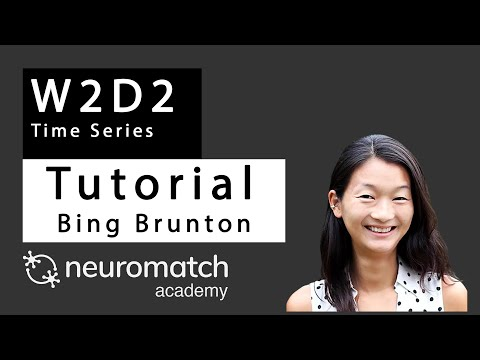

In [1]:
#@title Video 1: Markov Process
# Insert the ID of the corresponding youtube video
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="xZO6GbU48ns", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

# Summary of Video 1:

Markovian systems.
- the present determines the probability of transitions to the
next state. 
The present state is all you need to determine the probability
transitions to the next state. That means you're not dependent on
a longtime history, you don't care about where you were a long time ago
or even a moment ago, you only care about the present
state.
The second part of this definition is that it determines, the present
state determines the probability of transitions, which means that
transitions to the next state are not deterministic, in fact
they have some element of chance to it. 
eg: opening and closing of ion channels. These
ion channels, think of them as 
little bits that turn on and off that underlie all
of neural processes.
These are ion channels that are embedded in the
cytoplasm of a cell and depending on which ones,
what fraction of them are closed or open,
ion channels like sodium and chlorine
and potassium will float in and out of the cell
and that changes the electrical potential of the cell and is the
basis of an action potential.

But at a single channel,
these closing and opening events are
very well modeled as binary events.
Each channel is only either open or
closed. And you can monitor that by taking a
very small recording micropipette, sticking
it onto the cytoplasm of the cell, and
forming what's called a single channel patch-clamp.

And, thereby, monitoring
exactly what's happening: the flow of ions  through
a single channel. 
voltage in time of what a single ion channel would look like,
where you can see that it's a little bit stochastic
because temperature is not zero
Kelvin, and the channel is either closed
or it's open. And, when it closes
and when it goes from closed to open
and when it goes from open to closed is a stochastic process that has
some probability.

model this
by what's known as a telegraph process.
And a telegraph process is really simple, it has two states,
it's either closed or open, and we specify the
transitions among these states by two numbers.

So if it's closed, it will transition to the open state
with some probability, specified by probability of closed
to open.

And if it's open, it's going to transition to a closed
with a probability of open to closed, so
two numbers specifies everything probabilistically speaking.

- simulate the opening and closing of a single ion channel as a
state transition in a telegraph process, and we're just
going to be looking at trajectories of the states from
open to closed in time, and you're going to plot many of them, and as you
may suspect, because this is a probabilistic process, the trace is going to
look different every time, but they're going to be specified by
these two numbers that specify the probabilities.


Let's consider a Markov process with two states, where switches between each two states are probabilistic (known as a telegraph process). To be concrete, let's say we are modeling an **ion channel in a neuron that can be in one of two states: Closed (0) or Open (1)**. 

If the ion channel is Closed, it may transition to the Open state with probability $P(0 \rightarrow 1 | x = 0) = \mu_{c2o}$. Likewise, If the ion channel is Open, it transitions to Closed with probability $P(1 \rightarrow 0 | x=1) = \mu_{o2c}$.

We simulate the process of changing states as a **Poisson process**. The Poisson process is a way to model discrete events where the average time between event occurrences is known but the exact time of some event is not known. Importantly, the Poisson process dictates the following points: 
1. The probability of some event occurring is _independent from all other events_.
2. The average rate of events within a given time period is constant.
3. Two events cannot occur at the same moment. Our ion channel can either be in an open or closed state, but not both simultaneously. 

In the simulation below, we will use the Poisson process to model the state of our ion channel at all points $t$ within the total simulation time $T$. 

As we simulate the state change process, we also track at which times throughout the simulation the state makes a switch. We can use those times to measure the distribution of the time _intervals_ between state switches.

**Run the cell below** to show the state-change simulation process. Note that a random seed was set in the code block, so re-running the code will produce the same plot. Commenting out that line will produce a different simulation each run.

In [ ]:
# @title State-change simulation process

# parameters
T = 5000     # total Time duration
dt = 0.001   # timestep of our simulation

# simulate state of our ion channel in time
# the two parameters that govern transitions are
# c2o: closed to open rate
# o2c: open to closed rate
def ion_channel_opening(c2o, o2c, T, dt):
    # initialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    switch_times = []

    # assume we always start in Closed state
    x[0] = 0

    # generate a bunch of random uniformly distributed numbers
    # between zero and unity: [0, 1),
    # one for each dt in our simulation.
    # we will use these random numbers to model the
    # closed/open transitions
    myrand = np.random.random_sample(size=len(t))


    # walk through time steps of the simulation
    for k in range(len(t)-1):
        # switching between closed/open states are
        # Poisson processes
        if x[k] == 0 and myrand[k] < c2o*dt: # remember to scale by dt!
            x[k+1:] = 1
            switch_times.append(k*dt)
        elif x[k] == 1 and myrand[k] < o2c*dt:
            x[k+1:] = 0
            switch_times.append(k*dt)

    return t, x, switch_times


c2o = 0.02
o2c = 0.1
np.random.seed(0) # set random seed
t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)
plot_switch_simulation(t,x)

## Exercise 1 (2A): Computing intervals between switches
We now have `switch_times`, which is a list consisting of times when the state switched. Using this, calculate the time intervals between each state switch and store these in a list called `inter_switch_intervals`.

We will then plot the distribution of these intervals. How would you describe the shape of the distribution?


In [ ]:
##############################################################################
## TODO: Insert your code here to calculate between-state-switch intervals,
##       and uncomment the last line to plot the histogram
##############################################################################

# hint: see np.diff()
# inter_switch_intervals = ...


# plot_interswitch_interval_histogram(inter_switch_intervals)

In [ ]:
# to_remove solution

# hint: see np.diff()
inter_switch_intervals = np.diff(switch_times)

# plot inter-switch intervals
with plt.xkcd():
  plot_interswitch_interval_histogram(inter_switch_intervals)

We can also generate a bar graph to visualize the distribution of the number of time-steps spent in each of the two possible system states during the simulation. **Run the cell below** to visualize the distribution. 



In [ ]:
# @title Distribution of time spent in each state.

states = ['Closed', 'Open']
(unique, counts) = np.unique(x, return_counts=True)
plt.bar(states, counts)
plt.ylabel('Number of time steps')
plt.xlabel('State of ion channel');

<!-- Though the system started initially in the Closed ($x=0$) state, over time, it settles into a equilibrium distribution where we can predict on what fraction of time it is Open as a function of the $\mu$ parameters. 

Before we continue exploring these distributions further, let's first take a look at the this fraction of Open states as a cumulative mean of the state $x$: -->

Even though the state is _discrete_--the ion channel can only be either Closed or Open--we can still look at the **mean state** of the system, averaged over some window of time. 

Since we've coded Closed as $x=0$ and Open as $x=1$, conveniently, the mean of $x$ over some window of time has the interpretation of **fraction of time channel is Open**.

Let's also take a look at the fraction of Open states as a cumulative mean of the state $x$. The cumulative mean tells us the average number of state-changes that the system will have undergone after a certain amount of time. **Run the cell below**.

In [ ]:
# @title Cumulative mean of state
plt.plot(t, np.cumsum(x) / np.arange(1, len(t)+1))
plt.xlabel('time')
plt.ylabel('Cumulative mean of state');

Notice in the plot above that, although the channel started in the Closed ($x=0$) state, gradually adopted some mean value after some time. This mean value is related to the transition probabilities $\mu_{c2o}$
and $\mu_{o2c}$.

## Interactive Demo: Varying transition probability values & T

Using the interactive demo below, explore the state-switch simulation for different transition probability values of states $\mu_{c2o}$ and $\mu_{o2c}$. Also, try different values for total simulation time length *T*. 

Does the general shape of the inter-switch interval distribution change or does it stay relatively the same? How does the bar graph of system states change based on these values?

In [ ]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact
def plot_inter_switch_intervals(c2o = (0,1, .01), o2c = (0, 1, .01), T=(1000,10000, 1000)):

  t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)

  inter_switch_intervals = np.diff(switch_times)

  #plot inter-switch intervals
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()
  plt.close()

In [ ]:
# to_remove explanation
"""
Discussion:
(1) Does the general shape of the inter-switch interval distribution
change or does it stay relatively the same?
(2) How does the bar graph of system states change based on these values?

Answers:
(1) The shape of the distribution remains the same, but larger values of either
c2o or o2c shifts the distribution towards shorter intervals.
(2) If c2o is larger than o2c, then the channel tends to be open a larger
fraction of the time.

""";

---
# Section 2: Distributional Perspective



Video available at https://youtu.be/U6YRhLuRhHg


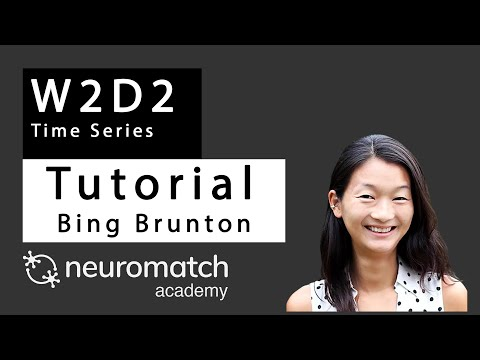

In [2]:
#@title Video 2: State Transitions
# Insert the ID of the corresponding youtube video
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="U6YRhLuRhHg", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

# Summary of Video 2:

Now imagine
you had a large number of ion channels. Now to any given moment,
some fraction of them are going to be open, and some other fraction
are going to be closed. Now, to understand what fraction are going to be open
and what fraction are going to be closed we can either, well, just run that simulation a lot of different times or
we can keep track instead of
individual ion channels we can keep track of the state as a probability.

So what I'm talking about here is now instead of keeping track of - if a single ion channel is in the closed state or the
open state, we're tracking the probability that
the channel is in the closed or the open state on average.

And we can write down 'a' by just looking at the state transition diagram on the diagonals
we have the respective probabilities of closed remaining closed and open remaining open and
these two off diagonal terms
specify the probability of transitioning between the close state to the open state or the open state to the close state.

write the simulation of the opening and closing and of ion channel as a
propagation of probabilities in time. Now instead of keeping track of
whether it is closed or open as a binary state, we're keeping track of the probabilities it's in either of those states.


We can run this simulation many times and gather empirical distributions of open/closed states. Alternatively, we can formulate the exact same system probabilistically, keeping track of the probability of being in each state.

<!-- Although the system started initially in the Closed ($x=0$) state, over time, it settles into a equilibrium distribution where we can predict on what fraction of time it is Open as a function of the $\mu$ parameters.  -->

(see diagram in lecture)

The same system of transitions can then be formulated using a vector of 2 elements as the state vector and a dynamics matrix $\mathbf{A}$. The result of this formulation is a *state transition matrix*:

$\left[ \begin{array}{c} C \\ O \end{array} \right]_{k+1} = \mathbf{A} \left[ \begin{array}{c} C \\ O \end{array} \right]_k = \left[ \begin{array} & 1-\mu_{\text{c2o}} & \mu_{\text{o2c}} \\ \mu_{\text{c2o}} & 1-\mu_{\text{o2c}} \end{array} \right] \left[ \begin{array}{c} C \\ O \end{array} \right]_k$.


Each transition probability shown in the matrix is as follows:
1. $1-\mu_{\text{c2o}}$, the probability that the closed state remains closed. 
2. $\mu_{\text{c2o}}$, the probability that the closed state transitions to the open state.
3.  $\mu_{\text{o2c}}$, the probability that the open state transitions to the closed state. 
4. $1-\mu_{\text{o2c}}$, the probability that the open state remains open. 


_Notice_ that this system is written as a discrete step in time, and $\mathbf{A}$ describes the transition, mapping the state from step $k$ to step $k+1$. This is different from what we did in the exercises above where $\mathbf{A}$ had described the function from the state to the time derivative of the state.


## Exercise 2 (2B): Probability Propagation

Complete the code below to simulate the propagation of probabilities of closed/open of the ion channel through time. A variable called `x_kp1` (short for, $x$ at timestep $k$ plus 1) should be calculated per each step *k* in the loop. However, you should plot $x$.

In [ ]:
def simulate_prob_prop(A, x0, dt, T):
  """ Simulate the propagation of probabilities given the transition matrix A,
  with initial state x0, for a duration of T at timestep dt.

  Args:
    A (ndarray): state transition matrix
    x0 (ndarray): state probabilities at time 0
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = x0 # x at time t_0

  # Step through the system in time
  for k in range(len(t)-1):
      ###################################################################
      ## TODO: Insert your code here to compute x_kp1 (x at k plus 1)
      raise NotImplementedError("Student exercise: need to implement simulation")
      ## hint: use np.dot(a, b) function to compute the dot product
      ##       of the transition matrix A and the last state in x
      ## hint 2: use np.vstack to append the latest state to x
      ###################################################################

      # Compute the state of x at time k+1
      x_kp1 = ...
      # Stack (append) this new state onto x to keep track of x through time steps
      x = ...

  return x, t

# parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate
c2o = 0.02
o2c = 0.1
A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])

# initial condition: start as Closed
x0 = np.array([[1, 0]])

# Uncomment this to plot the probabilities
# x, t = simulate_prob_prop(A, x0, dt, T)
# plot_state_probabilities(t,x)

In [ ]:
# to_remove solution

def simulate_prob_prop(A, x0, dt, T):
  """ Simulate the propagation of probabilities given the transition matrix A,
  with initial state x0, for a duration of T at timestep dt.

  Args:
    A (ndarray): state transition matrix
    x0 (ndarray): state probabilities at time 0
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = x0 # x at time t_0

  # Step through the system in time
  for k in range(len(t)-1):
      # Compute the state of x at time k+1
      x_kp1 = np.dot(A, x[-1,:])
      # Stack (append) this new state onto x to keep track of x through time steps
      x = np.vstack((x, x_kp1))

  return x, t

# parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate
c2o = 0.02
o2c = 0.1
A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])

# initial condition: start as Closed
x0 = np.array([[1, 0]])

# Uncomment this to plot the probabilities
x, t = simulate_prob_prop(A, x0, dt, T)
with plt.xkcd():
  plot_state_probabilities(t,x)

Here, we simulated the propagation of probabilities of the ion channel's state changing through time. Using this method is useful in that we can **run the simulation once** and see **how the probabilities propagate throughout time**, rather than re-running and empirically observing the telegraph simulation over and over again. 

Although the system started initially in the Closed ($x=0$) state, over time, it settles into a equilibrium distribution where we can predict what fraction of time it is Open as a function of the $\mu$ parameters. We can say that the plot above show this _relaxation towards equilibrium_.

Re-calculating our value of the probability of $c2o$ again with this method, we see that this matches the simulation output from the telegraph process! 



In [ ]:
print("Probability of state c2o: %.3f"%(c2o / (c2o + o2c)))
x[-1,:]

---
# Section 3: Equilibrium of the telegraph process

Video available at https://youtu.be/csetTTauIh8


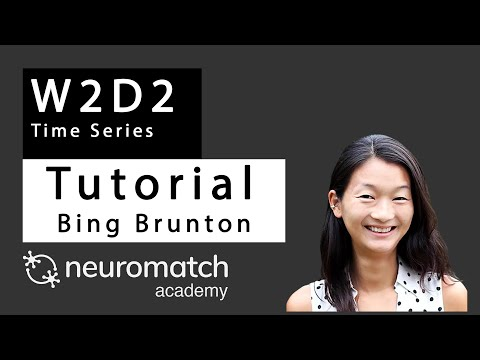

In [3]:
#@title Video 3: Continuous vs. Discrete Time Formulation
# Insert the ID of the corresponding youtube video
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="csetTTauIh8", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

# Summary of Video 3:

plot its numerical solutions in time,

What they have in common is that these are all dynamical systems,
In other case you have an 'a' matrix that tells you something about how the system evolves in time.
The continuous time formulation is written in terms of x dot and the discrete time formulation is written in terms of a map.
Now what this means is that the continuous time formulation tells you something about the flow and the direction,
there's a vector of how things change at that particular time.

In the continuous time formulation things don't change unless 'a' equals zero.
In the discrete time formulation, instead,
things don't change unless 'a' equals one.
So even though these two formulations are related, the stable solution lives in a very different place.
When we're looking at the eigenvalues of 'a' which determines the stability
of the discrete time formulation 

if you plot the eigenvalue spectrum of 'a'
you can separate it into growing decaying or stable with oscillations and frequencies of oscillation on the imaginary axis.

If you are looking at the discrete time formulation
and the eigenvalue spectrum of 'a' in the discrete time formulation:
Instead of looking at the left half plane or the right half plane,
we're actually looking at whether inside or outside the unit circle. Where the unit circle is where the eigenvalue has a radius of one
and things are totally stable on the unit circle. Everything inside the unit circle is going to be decaying everything outside
the unit circle is going to be growing.
Now these two eigenvalues spectra are actually related to each other
by a logarithm operation where you scale it 

In the continuous time formulation 'b' is proportional to the frequency,
and if you take the logarithm of that what you'll discover, is that the angle
of the eigenvalue is proportional to the frequency of oscillation. 

If we go back to our probabilistic model of closing and opening ion channels
and take the eigendecomposition of this 'a' matrix here,
 this is a two by two system, you're going to get two eigenvalues and two eigenvectors.

 goal is to discover which of these eigenvalues corresponds to the stable solution.
In other words which one equals one?

And if you look at the corresponding eigenvector that tells you something about the direction in which
this solution is stable.

So,  take the eigendecomposition of 'a'
and identify which one is a stable solution and look at its corresponding eigenvector and you're going to compare
this eigenvector to the equilibrium numerical solution.


Since we have now modeled the propagation of probabilities by the transition matrix $\mathbf{A}$ in Section 2, let's connect the behavior of the system at equilibrium with the eigendecomposition of $\mathbf{A}$.

As introduced in the lecture video, the eigenvalues of $\mathbf{A}$ tell us about the stability of the system, specifically in the directions of the corresponding eigenvectors.

In [ ]:
# compute the eigendecomposition of A
lam, v = np.linalg.eig(A)

# print the 2 eigenvalues
print("Eigenvalues:",lam)

# print the 2 eigenvectors
eigenvector1 = v[:,0]
eigenvector2 = v[:,1]
print("Eigenvector 1:", eigenvector1)
print("Eigenvector 2:", eigenvector2)

## Exercise 3 (2C): Finding a stable state

Which of these eigenvalues corresponds to the **stable** (equilibrium) solution? What is the eigenvector of this eigenvalue? How does that explain 
the equilibrium solutions in simulation in Section 2 of this tutorial?

_hint_: our simulation is written in terms of probabilities, so they must sum to 1. Therefore, you may also want to rescale the elements of the eigenvector such that they also sum to 1. These can then be directly compared with the probabilities of the states in the simulation. 

In [ ]:
###################################################################
## Insert your thoughts here
###################################################################

In [ ]:
# to_remove explanation
"""
Discussion:
Which of the eigenvalues corresponds to the stable solution?
What is the eigenvector of this eigenvalue?
How does that explain the equilibrium solutions in Section 2?

Recommendation:
Ask the students to work in small groups (of 2 or 3) to discuss these questions.


Answers:
Whichever eigenvalue is 1 is the stable solution. There should be another
eigenvalue that is <1, which means it is decaying and goes away after the
transient period.

The eigenvector corresponding to this eigenvalue is the stable solution.
To see this, we need to normalize this eigenvector so that its 2 elements
sum to one, then we would see that the two numbers correspond to
[P(open), P(closed)] at equilibrium -- hopefully these are exactly the
equilibrium solutions observed in Section 2.


""";


# whichever eigenvalue is 1, the other one makes no sense
print(eigenvector1 / eigenvector1.sum())
print(eigenvector2 / eigenvector2.sum())

---
# Summary

In this tutorial, we learned:

* The definition of a Markov process with history dependence.
* The behavior of a simple 2-state Markov proces--the telegraph process--can be simulated either as a state-change simulation or as a propagation of probability distributions.
* The relationship between the stability analysis of a dynamical system expressed either in continuous or discrete time.
* The equilibrium behavior of a telegraph process is predictable and can be understood using the same strategy as for deterministic systems in Tutorial 1: by taking the eigendecomposition of the A matrix.